# Potato Disease Classification Model Testing

This notebook tests the trained potato disease classification model using the saved `0.keras` file.

## Import Required Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

In [2]:
# Check TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


## Load Pre-trained Model

In [3]:
# Load the saved model - using legacy h5 loading due to version incompatibility
try:
    # Try loading with legacy loader
    from tensorflow.keras import models
    model = models.load_model('0.keras', compile=False)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")
    print("\nTrying alternative loading method...")
    # Alternative: load weights only if model architecture is known
    # This will require reconstructing the model architecture
    raise

print(f"Model input shape: {model.input_shape}")
print(f"Model output shape: {model.output_shape}")

Model loaded successfully!
Model input shape: (32, 256, 256, 3)
Model output shape: (32, 3)


## Define Class Names

In [4]:
# Define class names for potato diseases
class_names = ['Early Blight', 'Late Blight', 'Healthy']
print(f"Classes: {class_names}")

Classes: ['Early Blight', 'Late Blight', 'Healthy']


## Load and Preprocess Test Image

In [8]:
def load_and_preprocess_image(img_path, target_size=(256, 256)):
    """
    Load and preprocess an image for prediction
    """
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # No normalization - feed raw pixel values
    return img, img_array

## Make Predictions on Test Image

In [11]:
# Specify your test image path
test_image_path = 'test_image_3.JPG'

# Load and preprocess the image
img, img_array = load_and_preprocess_image(test_image_path)

# Make prediction
predictions = model.predict(img_array)
predicted_class_idx = np.argmax(predictions[0])
predicted_class = class_names[predicted_class_idx]
confidence = predictions[0][predicted_class_idx] * 100

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")
print(f"\nAll class probabilities:")
for i, class_name in enumerate(class_names):
    print(f"{class_name}: {predictions[0][i]*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predicted Class: Early Blight
Confidence: 100.00%

All class probabilities:
Early Blight: 100.00%
Late Blight: 0.00%
Healthy: 0.00%


## Visualize Prediction

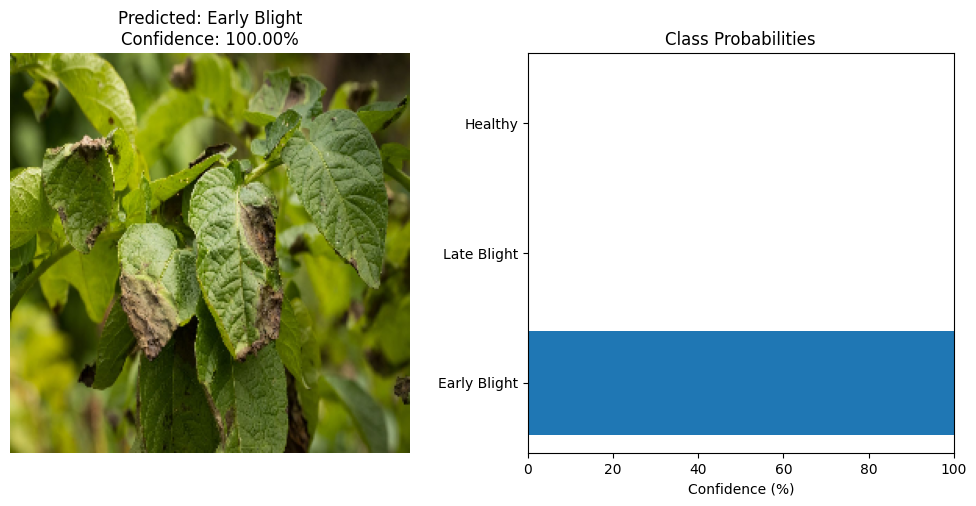

In [12]:
# Display the image with prediction
plt.figure(figsize=(10, 5))

# Show the image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}\nConfidence: {confidence:.2f}%')
plt.axis('off')

# Show probability distribution
plt.subplot(1, 2, 2)
plt.barh(class_names, predictions[0] * 100)
plt.xlabel('Confidence (%)')
plt.title('Class Probabilities')
plt.xlim(0, 100)

plt.tight_layout()
plt.show()